<a href="https://colab.research.google.com/github/nikiska77/ydata-viz-ai/blob/main/Shared_Viz_ai_DCIOM-v13-03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading from the extra source and getting patient studies data

To use this notebook you need to save the data to your Google Drive and then to launch your google drive (it is needed only once). You need to keep the same structure that we have in the zip file from Coby. The first folder shoud be Study/. 

To check this you may refer to the cell with the path (for example, path_to_head = Path("/content/drive/MyDrive/Study/CT Plain")
So, the /content/drive/MyDrive is your Drive and the rest is the path to folders from the archive


In [1]:
from google.colab import drive 
import os
from pathlib import Path

drive.mount('/content/drive')
home_path = Path("/content/drive/MyDrive/VIZ")
os.chdir(home_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install wget

In [3]:
#sometimes for some reasons it does not work... 
!pip install -U git+https://github.com/pydicom/pydicom.git
#pip install --no-cache-dir git+https://github.com/pydicom/pydicom.git
!pip install python-gdcm



  Cloning https://github.com/pydicom/pydicom.git to /tmp/pip-req-build-obx2qf3b
  Running command git clone -q https://github.com/pydicom/pydicom.git /tmp/pip-req-build-obx2qf3b


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pydicom import dcmread

#import pylibjpeg

In [ ]:
###################################### RUN ONLY ONCE #######################
# download ZIP files (is needed only once)

import wget

with open('YdataDataset.txt', 'r') as f:
  for line in f.readlines()[:10]:
    print(line)
    wget.download(line.replace('\n',''))
    #wget.download(line.replace('\n',''), '/content')

print('all the files are downloaded to yout home directory')    

all the files are downloaded to yout home directory


In [ ]:
#extracting ZIP archives

from zipfile import ZipFile

all_zips = sorted(list(home_path.glob("*.zip")))
for archiv in all_zips:
  dir_name=str(archiv).split('/')[-1].split('.')[0]
  folder_dest = str(home_path) + '/' + dir_name
  with ZipFile(archiv, 'r') as zipObj:
      zipObj.extractall()

###################################### RUN ONLY ONCE #######################

So, now we have 10 first studies (from the dataset list Coby provided) that are extracted to your google drive and you can work with data

In [7]:
tree = os.walk(home_path)
folder = []
for i in tree:
  folder.append(i)


for address, dirs, files in folder:
  print(address, dirs, files)
  break
  for dir in dirs:
    print('*****')
    print(files)
    #if files == []:
    #  print('this dir is empty')
    #else:
     # print('this dir is NOT empty')
    print(dir)
  #for file in files:
   # print(address+'/'+file)
   
   
   
   

/content/drive/MyDrive/VIZ ['.ipynb_checkpoints', 'CQ500CT0 CQ500CT0', 'CQ500CT1 CQ500CT1', 'CQ500CT10 CQ500CT10', 'CQ500CT100 CQ500CT100', 'CQ500CT101 CQ500CT101', 'CQ500CT102 CQ500CT102', 'CQ500CT103 CQ500CT103', 'CQ500CT104 CQ500CT104', 'CQ500CT105 CQ500CT105', 'CQ500CT106 CQ500CT106'] ['YdataDataset.txt', 'CQ500-CT-0.zip', 'CQ500-CT-1.zip', 'CQ500-CT-10.zip', 'CQ500-CT-100.zip', 'CQ500-CT-101.zip', 'CQ500-CT-102.zip', 'CQ500-CT-103.zip', 'CQ500-CT-104.zip', 'CQ500-CT-105.zip', 'CQ500-CT-106.zip']


In [8]:
#let's save all the folders of the studies in a new variable 
study_folders = []
for name in os.listdir():
  if os.path.isdir(name):
    if name[0] == '.':
      pass
    else:
      study_folders.append(name)

In [9]:
patients_data = []
for folder in study_folders:
  checkpath = os.path.join(home_path, folder)
  j=0
  temp_data = []
  for each in os.walk(checkpath):
    #print(each)
    if each[2] == []:
      #print('empty list of files', each[0])
      pass
    else:
      j+=1 
      #print('patient:', folder)
      #print('study_folder',each[0])
      temp_data.append([folder, each[0]])
  if j == 1: #there is only one folder for the patient
    print('Adding data for the patient:', temp_data[0])
    patients_data.append(temp_data[0])
  else:
    found=False
    for each in temp_data:
      if 'thin' in each[1].lower():
        found=True
        print('Adding data for the patient:', each)
        patients_data.append(each)
        break
    if not found:
      patients_data.append(temp_data[0])
      print('Adding data for the patient:', temp_data[0])
  print('*****')
  #print(checkpath)
  


Adding data for the patient: ['CQ500CT0 CQ500CT0', '/content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT1 CQ500CT1', '/content/drive/MyDrive/VIZ/CQ500CT1 CQ500CT1/Unknown Study/CT 2.55mm']
*****
Adding data for the patient: ['CQ500CT10 CQ500CT10', '/content/drive/MyDrive/VIZ/CQ500CT10 CQ500CT10/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT100 CQ500CT100', '/content/drive/MyDrive/VIZ/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN']
*****
Adding data for the patient: ['CQ500CT101 CQ500CT101', '/content/drive/MyDrive/VIZ/CQ500CT101 CQ500CT101/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT102 CQ500CT102', '/content/drive/MyDrive/VIZ/CQ500CT102 CQ500CT102/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT103 CQ500CT103', '/content/drive/MyDrive/VIZ/CQ500CT103 CQ500CT103/Unknown Study/CT Thin Plain']
*****
Adding data for the patient: ['CQ500C

Finally we have the array with all the folders with different studies for the chosen patients (we chose THIN folder if we have it)

In [9]:
patients_data

[['CQ500CT0 CQ500CT0',
  '/content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0/Unknown Study/CT PLAIN THIN'],
 ['CQ500CT1 CQ500CT1',
  '/content/drive/MyDrive/VIZ/CQ500CT1 CQ500CT1/Unknown Study/CT 2.55mm'],
 ['CQ500CT10 CQ500CT10',
  '/content/drive/MyDrive/VIZ/CQ500CT10 CQ500CT10/Unknown Study/CT PLAIN THIN'],
 ['CQ500CT100 CQ500CT100',
  '/content/drive/MyDrive/VIZ/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN'],
 ['CQ500CT101 CQ500CT101',
  '/content/drive/MyDrive/VIZ/CQ500CT101 CQ500CT101/Unknown Study/CT PLAIN THIN'],
 ['CQ500CT102 CQ500CT102',
  '/content/drive/MyDrive/VIZ/CQ500CT102 CQ500CT102/Unknown Study/CT PLAIN THIN'],
 ['CQ500CT103 CQ500CT103',
  '/content/drive/MyDrive/VIZ/CQ500CT103 CQ500CT103/Unknown Study/CT Thin Plain'],
 ['CQ500CT104 CQ500CT104',
  '/content/drive/MyDrive/VIZ/CQ500CT104 CQ500CT104/Unknown Study/CT PLAIN THIN'],
 ['CQ500CT105 CQ500CT105',
  '/content/drive/MyDrive/VIZ/CQ500CT105 CQ500CT105/Unknown Study/CT PRE CONTRAST THIN'],
 ['CQ500CT106 CQ500CT106',


In [ ]:
'''
first_path = os.path.join(home_path, study_folders[0])
for root, dirs, files in os.walk(first_path):
   #for name in files:
    #  print(os.path.join(root, name))
   print(dirs)
   for name in dirs:
      print(os.path.join(root, name))

'''

'\nfirst_path = os.path.join(home_path, study_folders[0])\nfor root, dirs, files in os.walk(first_path):\n   #for name in files:\n    #  print(os.path.join(root, name))\n   print(dirs)\n   for name in dirs:\n      print(os.path.join(root, name))\n\n'

## to print all the folders

# 1 Printing the images from patient CQ500CT0 CQ500CT0 
 path: /content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0/Unknown Study/CT PLAIN THIN


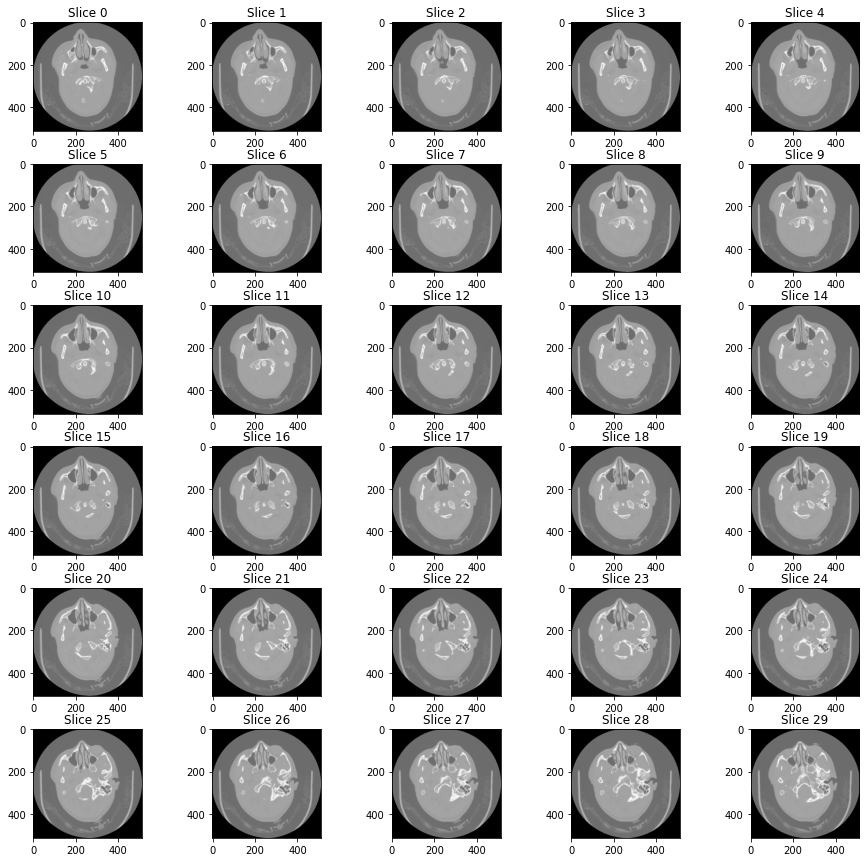

*************** 

# 2 Printing the images from patient CQ500CT1 CQ500CT1 
 path: /content/drive/MyDrive/VIZ/CQ500CT1 CQ500CT1/Unknown Study/CT 2.55mm


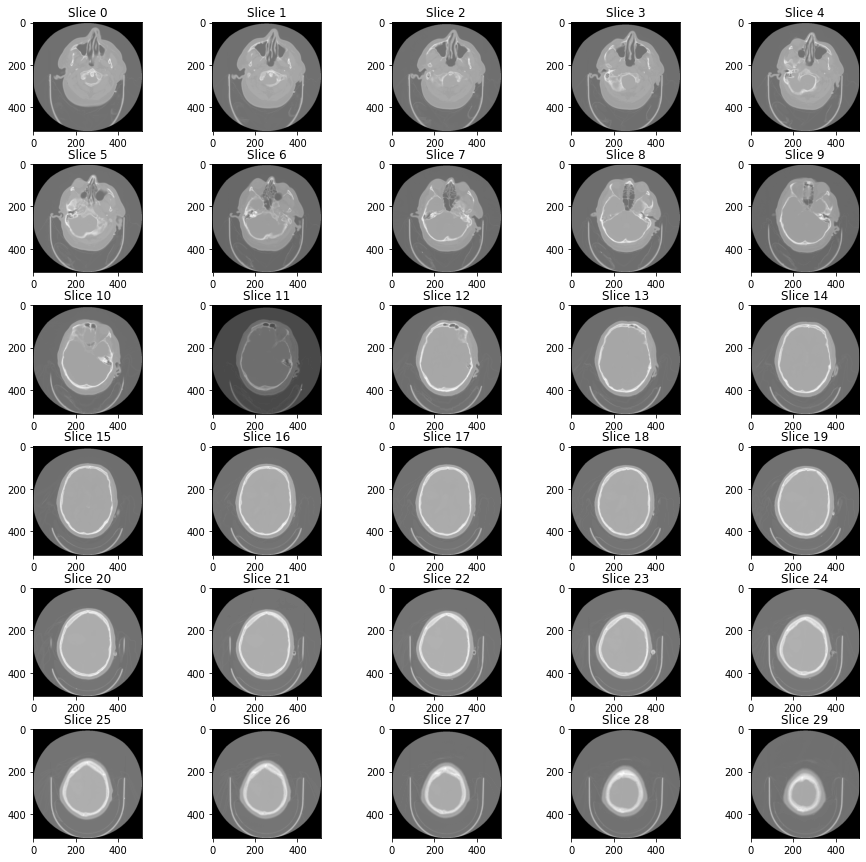

*************** 

# 3 Printing the images from patient CQ500CT10 CQ500CT10 
 path: /content/drive/MyDrive/VIZ/CQ500CT10 CQ500CT10/Unknown Study/CT PLAIN THIN


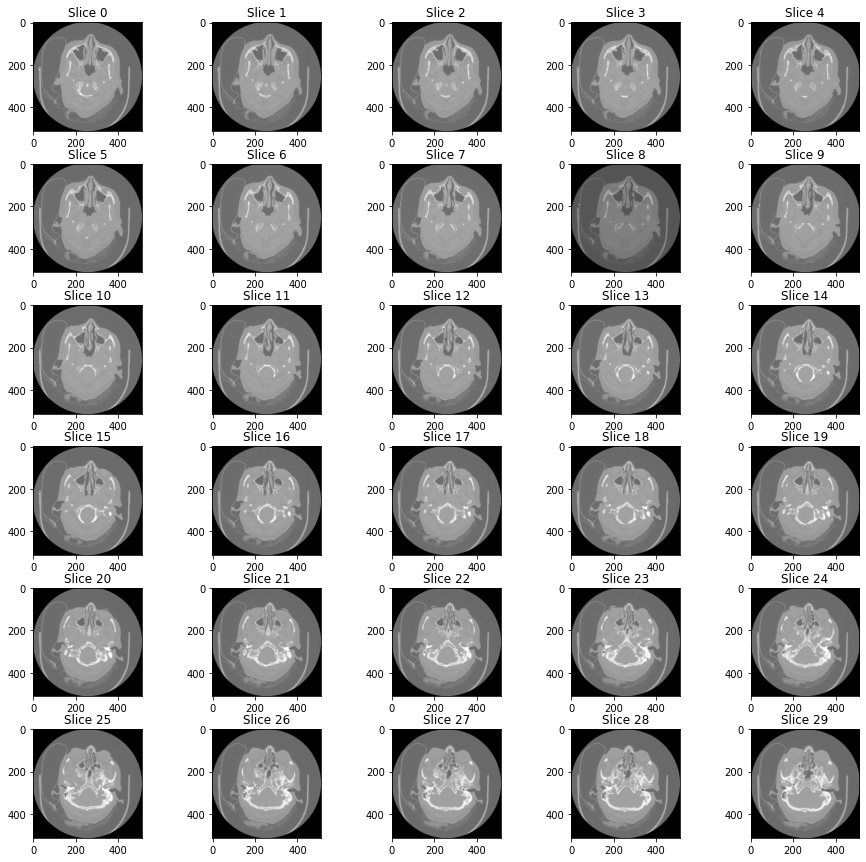

*************** 

# 4 Printing the images from patient CQ500CT100 CQ500CT100 
 path: /content/drive/MyDrive/VIZ/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN


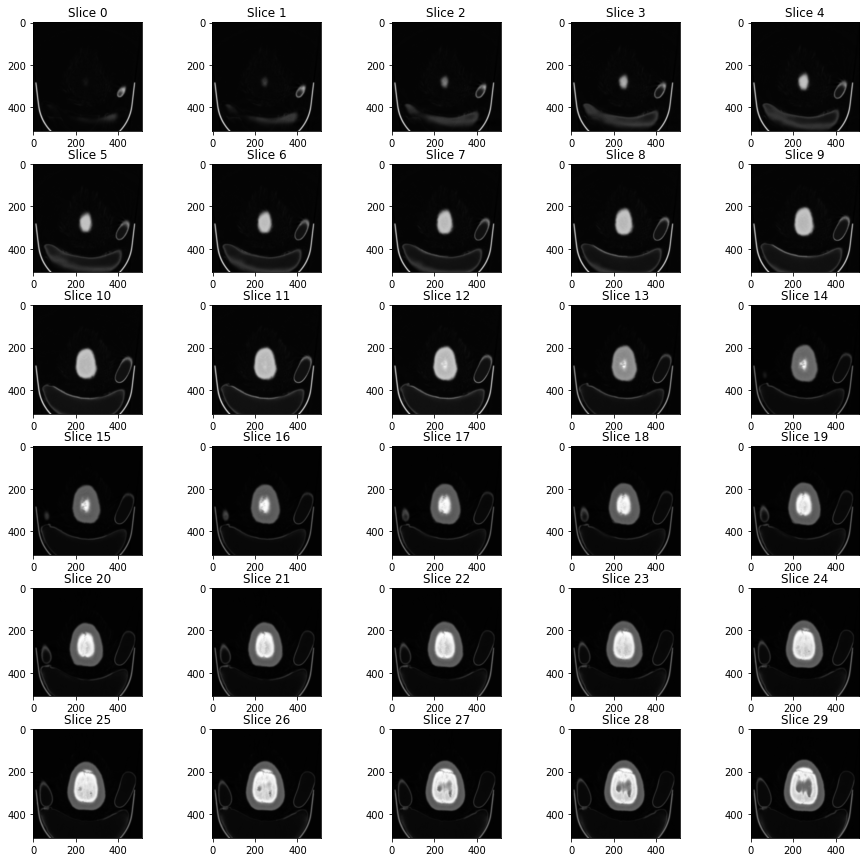

*************** 

# 5 Printing the images from patient CQ500CT101 CQ500CT101 
 path: /content/drive/MyDrive/VIZ/CQ500CT101 CQ500CT101/Unknown Study/CT PLAIN THIN


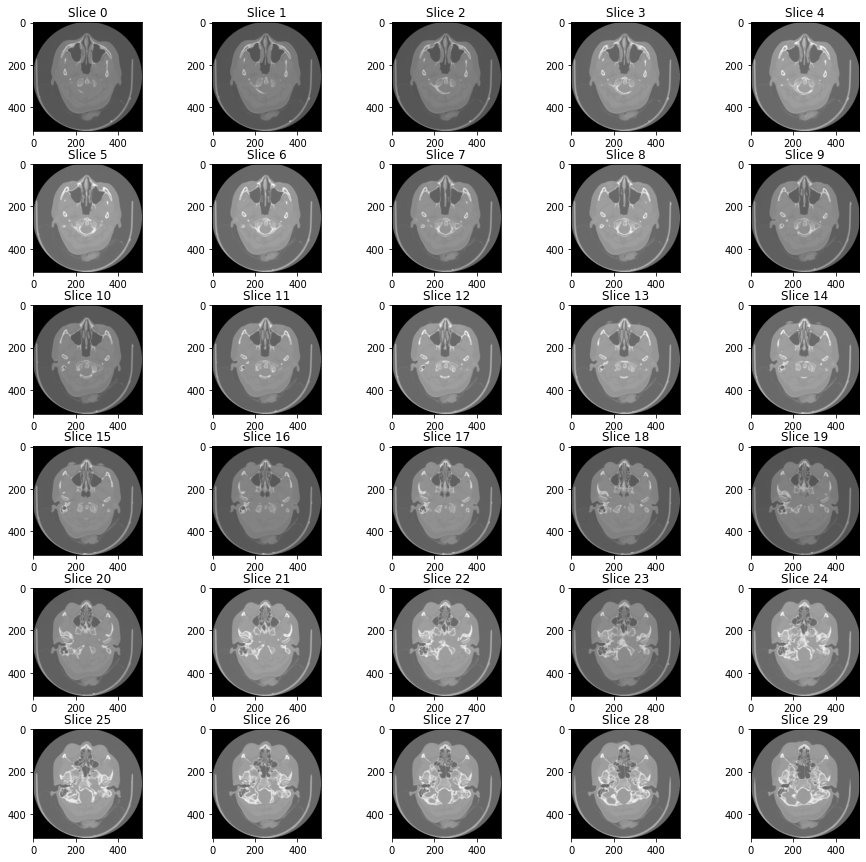

*************** 

# 6 Printing the images from patient CQ500CT102 CQ500CT102 
 path: /content/drive/MyDrive/VIZ/CQ500CT102 CQ500CT102/Unknown Study/CT PLAIN THIN


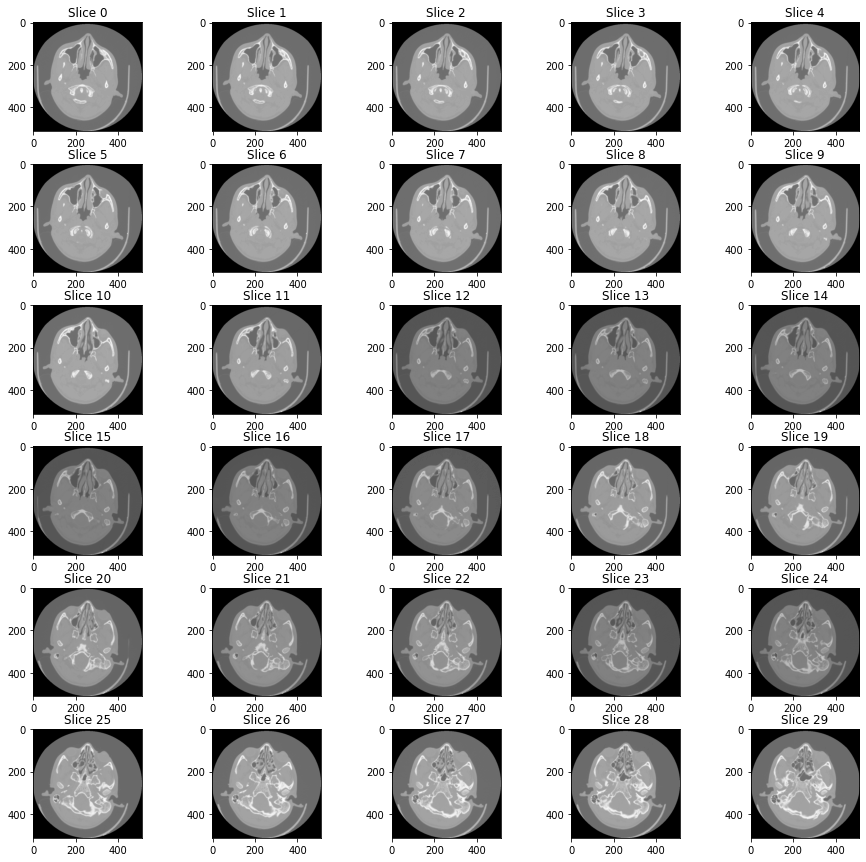

*************** 

# 7 Printing the images from patient CQ500CT103 CQ500CT103 
 path: /content/drive/MyDrive/VIZ/CQ500CT103 CQ500CT103/Unknown Study/CT Thin Plain


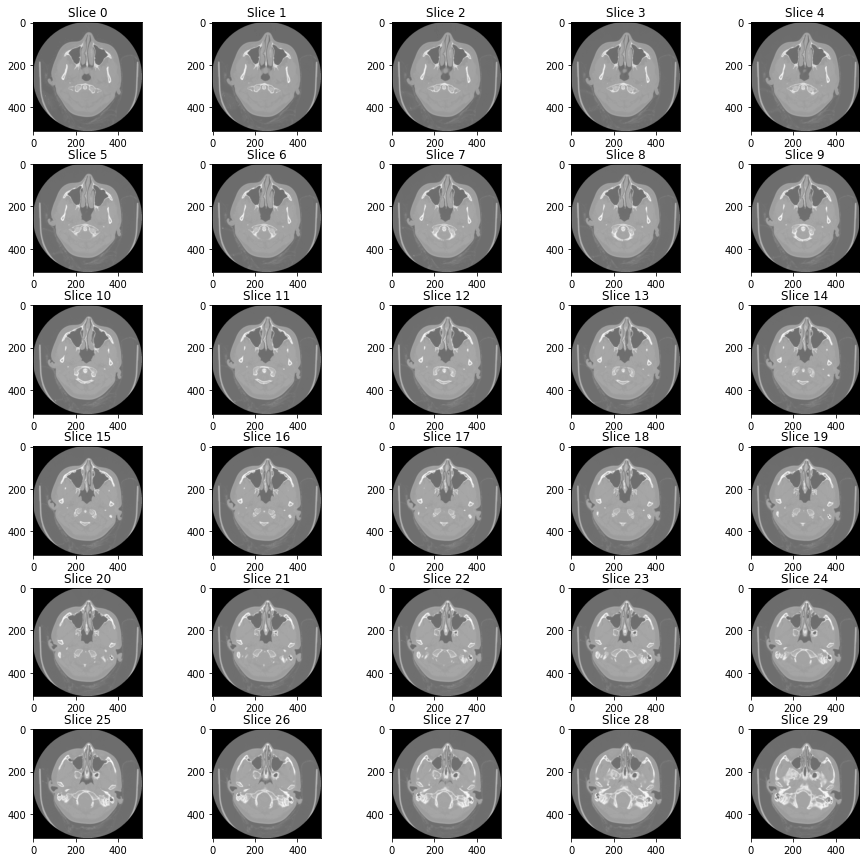

*************** 

# 8 Printing the images from patient CQ500CT104 CQ500CT104 
 path: /content/drive/MyDrive/VIZ/CQ500CT104 CQ500CT104/Unknown Study/CT PLAIN THIN


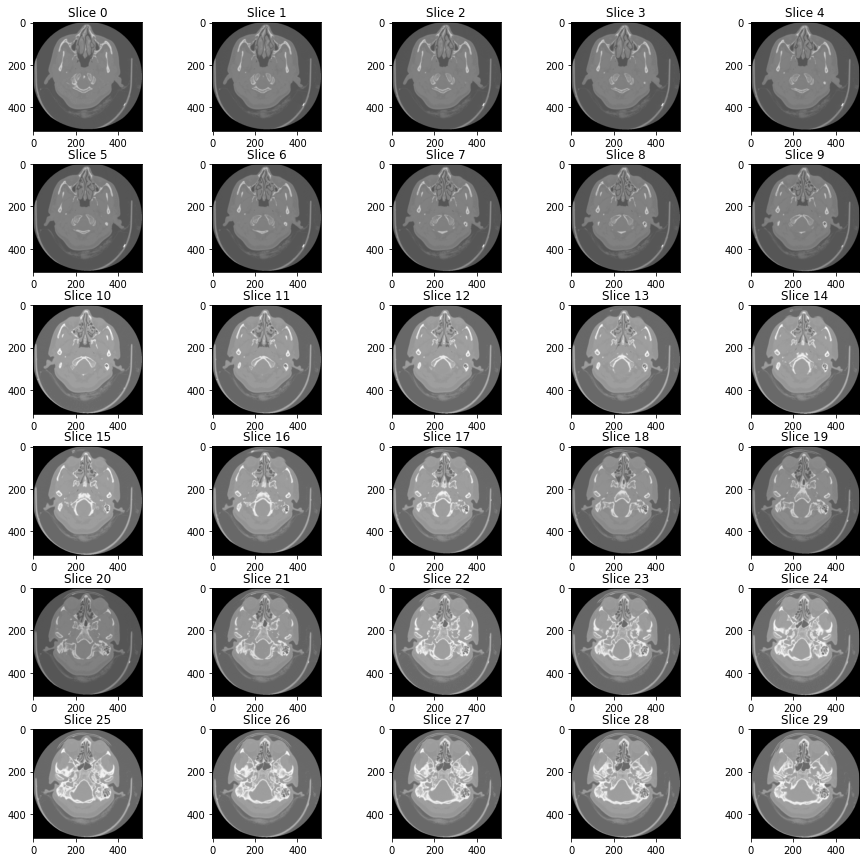

*************** 

# 9 Printing the images from patient CQ500CT105 CQ500CT105 
 path: /content/drive/MyDrive/VIZ/CQ500CT105 CQ500CT105/Unknown Study/CT PRE CONTRAST THIN


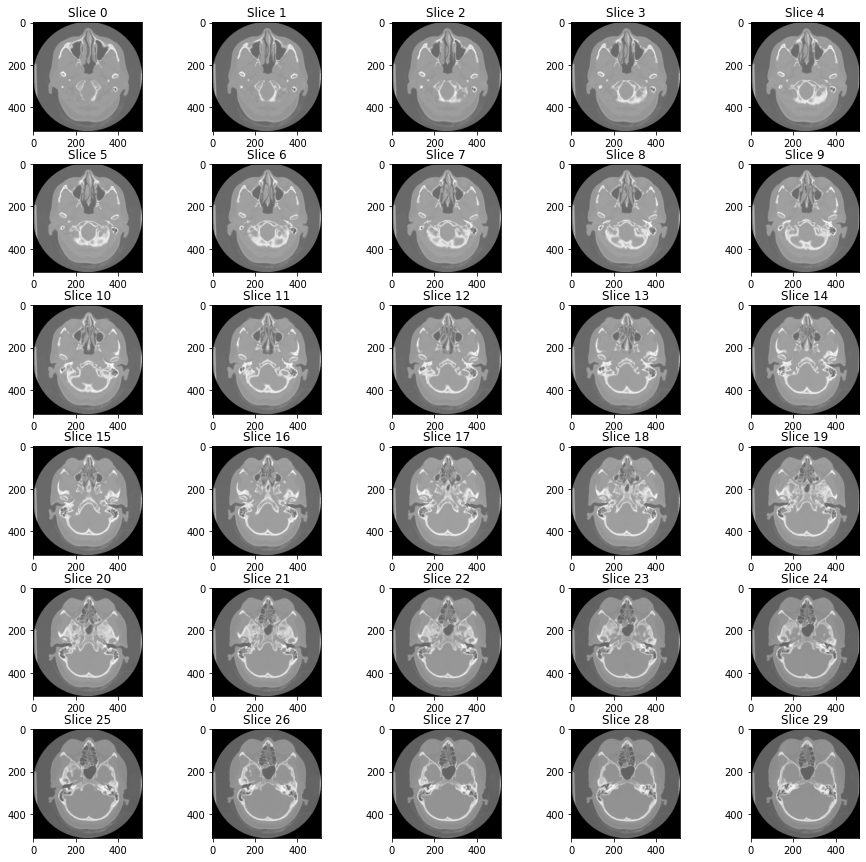

*************** 

# 10 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT106 CQ500CT106/Unknown Study/CT Thin Plain


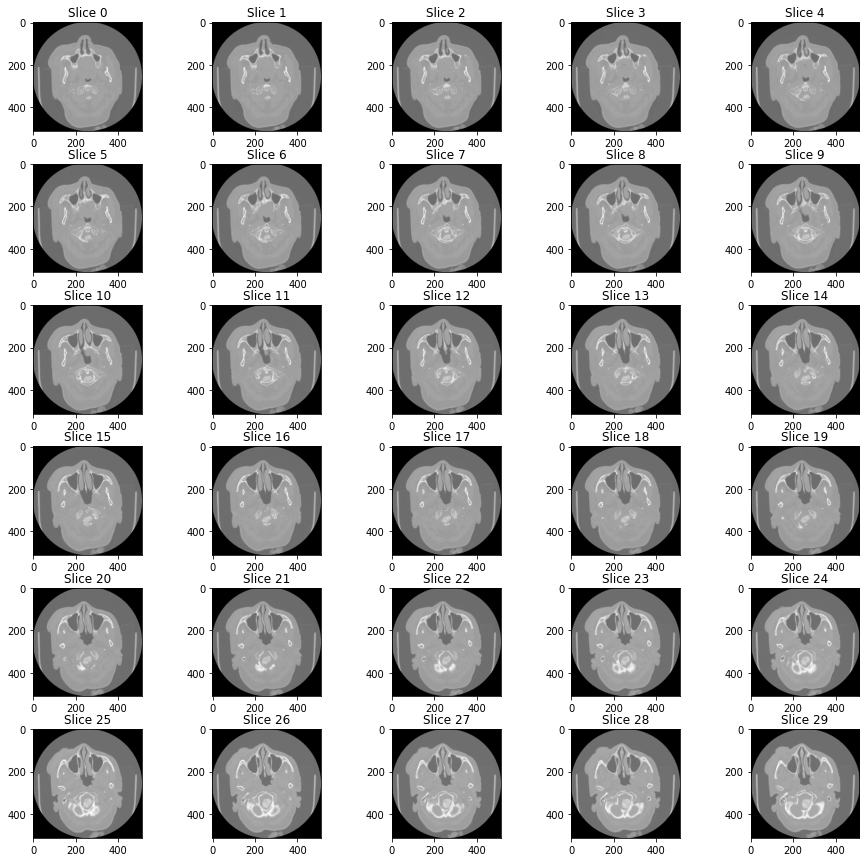

*************** 



In [11]:
#patients_data - the first element is the name of the global folder (patient),
#and the second element - path to the head 
#folders = ['CT 4cc sec 150cc D3D on','CT 4cc sec 150cc D3D on-2','CT 4cc sec 150cc D3D on-3','CT PLAIN THIN', 'CT Plain']
patients_dcm=dict()
iter=0
for patient, path in patients_data:
  ct_data, unstacked_list = [], []
  path_to_head = Path(path)
  all_files = sorted(list(path_to_head.glob("*.dcm")))  # as glob returns a generator, we convert it to a list
  #print(all_files)
  for dicom_filepath in all_files:
    dicom = dcmread(dicom_filepath)
    ct_data.append(dicom)

  ct_data_ordered = sorted(ct_data, key=lambda slice: slice.SliceLocation) 

  ### Ordered slices ###
  #for slice in ct_data_ordered[:5]:
   #   print(slice.SliceLocation)


  for each_slice in ct_data_ordered:
      np_pixel_array = each_slice.pixel_array
      unstacked_list.append(np_pixel_array)
  final_array = np.array(unstacked_list)
  patients_dcm[iter] = final_array.copy()
  print('#',iter+1,'Printing the images from patient', patient, '\n path:',path)
  iter+=1

  fig, axis = plt.subplots(6, 5, figsize=(15, 15))

  slice_counter = 0
  for i in range(6):
      for j in range(5):
          axis[i][j].imshow(final_array[slice_counter], cmap="gray")
          axis[i][j].set_title('Slice '+str(slice_counter))
          slice_counter+=1
  plt.subplots_adjust(wspace=0.5, hspace=0.3)
  plt.show()
  print('*************** \n')
  

In [75]:
dicom

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.296485376.1.1521713628.1863908
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.2
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_362'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: ''
(0008, 0013) Instance Creation Time              TM: ''
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP 

In [76]:
dicom.SeriesDescription
print(patients_dcm.keys())

'Thin Plain'

In [ ]:
patients_dcm[0]

array([[[-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        ...,
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000]],

       [[-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        ...,
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000]],

       [[-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        ...,
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -20

So, the variable patients_dcm (dictionary) keeps all the arrays of all the patients

##MIP working variant

In [ ]:
len(plain_data_ordered)
medical_image = plain_data_ordered[0]
image = medical_image.pixel_array
print(image.min(), image.max())

-2000 2732


In [ ]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

hu_image = transform_to_hu(medical_image, image)
brain_image = window_image(hu_image, 40, 80)
bone_image = window_image(hu_image, 400, 1000)

def plot_4images(image, hu_image, brain_image, bone_image):
    plt.figure(figsize=(15, 2.5))
    plt.subplot(141)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(142)
    plt.imshow(hu_image, cmap='gray')
    plt.title('Hu Image')
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(brain_image, cmap='gray')
    plt.title('Brain Image')
    plt.axis('off')

    plt.subplot(144)
    plt.imshow(bone_image, cmap='gray')
    plt.title('Bone Image')
    plt.axis('off')


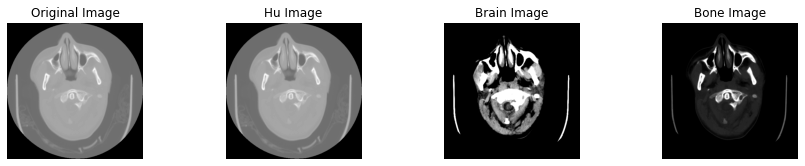

In [ ]:
plot_4images(image, hu_image, brain_image, bone_image)

In [ ]:
medical_image2 = plain_data_ordered[10]
image2 = medical_image2.pixel_array
print(image2.min(), image2.max())

-2000 2733


In [ ]:
hu_image2 = transform_to_hu(medical_image2, image2)
brain_image2 = window_image(hu_image2, 40, 80)
bone_image2 = window_image(hu_image2, 400, 1000)


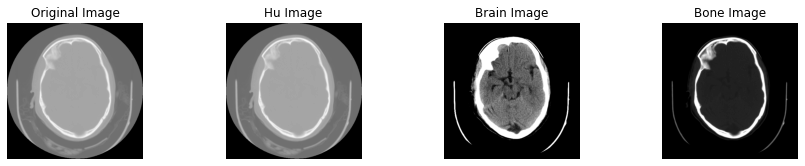

In [ ]:
plot_4images(image2, hu_image2, brain_image2, bone_image2)

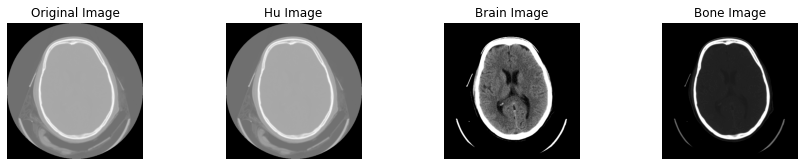

In [ ]:
medical_image3 = plain_data_ordered[15]
image3 = medical_image3.pixel_array
hu_image3 = transform_to_hu(medical_image3, image3)
brain_image3 = window_image(hu_image3, 40, 80)
bone_image3 = window_image(hu_image3, 400, 1000)
plot_4images(image3, hu_image3, brain_image3, bone_image3)

In [ ]:
#print(d_file[0x0028, 0x0010])
#print(d_file[0x0028, 0x0011])
#print('Rows: ', d_file.Rows)
#print('Columns: ', d_file.Columns)
#d_file.PhotometricInterpretation 
#ct = d_file.pixel_array

##Different planes and real volume pics

skipped, no SliceLocation: 0


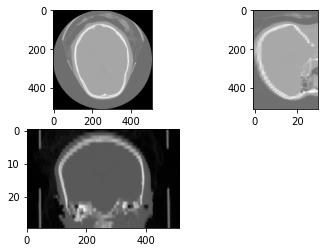

In [ ]:
import sys
import glob

# load the DICOM files
files = []
"""
print('glob: {}'.format(sys.argv[1]))
for fname in glob.glob(sys.argv[1], recursive=False):
    print("loading: {}".format(fname))
    files.append(dcmread(fname))

print("file count: {}".format(len(files)))
"""

home_path = '/content/drive/MyDrive/Study/'
folder = 'CT Plain'

path_to_head = Path(home_path + folder)
all_files = sorted(list(path_to_head.glob("*.dcm")))  # as glob returns a generator, we convert it to a list
  #print(all_files)
  #all_files=all_files[:-1]
for dicom_filepath in all_files:
    dicom = dcmread(dicom_filepath)
    files.append(dicom)


# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

img3d = np.flip(img3d, axis=None)


# plot 3 orthogonal slices
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2], cmap='gray')
# we are simply just taking the center of the plane img_shape[2]//2
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :], cmap='gray')
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T, cmap='gray')
a3.set_aspect(cor_aspect)

plt.show()

In [ ]:
img3d[img_shape[0]//2, :, :].T.shape

(30, 512)

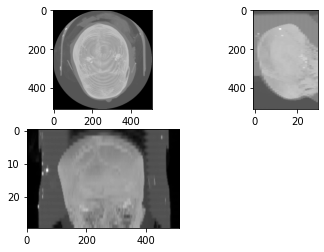

In [ ]:

#creating volume ax
img3d_vol = np.zeros(img3d.shape)
img3d_vol = img3d.max(axis=2)

a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d_vol, cmap='gray')
a1.set_aspect(ax_aspect)

#creating volume sagital
img3d_vol = np.zeros(img3d.shape)
img3d_vol = img3d.max(axis=1)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d_vol, cmap='gray')
a2.set_aspect(sag_aspect)


#creating volume coronal
img3d_vol = np.zeros(img3d.shape)
img3d_vol = img3d.max(axis=0)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d_vol.T, cmap='gray')
a3.set_aspect(cor_aspect)

plt.show()


In [ ]:
#np.savez(“CT.npz”, I=img3d)

## #### Code from Coby 3rd meeting

In [12]:
#we have 10 patients 
print(patients_dcm.keys())
for _ in patients_data:
  print(_)

print(patients_dcm[3])

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
['CQ500CT0 CQ500CT0', '/content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0/Unknown Study/CT PLAIN THIN']
['CQ500CT1 CQ500CT1', '/content/drive/MyDrive/VIZ/CQ500CT1 CQ500CT1/Unknown Study/CT 2.55mm']
['CQ500CT10 CQ500CT10', '/content/drive/MyDrive/VIZ/CQ500CT10 CQ500CT10/Unknown Study/CT PLAIN THIN']
['CQ500CT100 CQ500CT100', '/content/drive/MyDrive/VIZ/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN']
['CQ500CT101 CQ500CT101', '/content/drive/MyDrive/VIZ/CQ500CT101 CQ500CT101/Unknown Study/CT PLAIN THIN']
['CQ500CT102 CQ500CT102', '/content/drive/MyDrive/VIZ/CQ500CT102 CQ500CT102/Unknown Study/CT PLAIN THIN']
['CQ500CT103 CQ500CT103', '/content/drive/MyDrive/VIZ/CQ500CT103 CQ500CT103/Unknown Study/CT Thin Plain']
['CQ500CT104 CQ500CT104', '/content/drive/MyDrive/VIZ/CQ500CT104 CQ500CT104/Unknown Study/CT PLAIN THIN']
['CQ500CT105 CQ500CT105', '/content/drive/MyDrive/VIZ/CQ500CT105 CQ500CT105/Unknown Study/CT PRE CONTRAST THIN']
['CQ500CT106 CQ500CT1

In [9]:
# CELL WITH ALL THE FUNCTIONS WE NEED TO PREPROCESS THE DATA
def fast_check(slices, num=25, thick=2, psp=1):
  #to check slices on the number of slices (num=25), its thickness (thick=2), and pizel spasing (psp=1)
  wrong_thick, wrong_sp = [], []
  if len(slices) * slices[0].SliceThickness < num:
    print('!!! The number of slices is not enough in this study')
  else:
    print('number of slices - OK.')
  for each in slices:
    if each.SliceThickness > thick:
      wrong_thick.append((each.SliceLocation, each.SliceThickness))
    if (each.PixelSpacing[0] > psp) or (each.PixelSpacing[1] > psp):
      wrong_sp.append((each.SliceLocation, each.PixelSpacing))
  #printing result
  if len(wrong_sp) > 0:
    print('!!! the slices spacing is too big')
    for _ in wrong_sp:
      print('slice;', wrong_sp[0], ', spacing:', wrong_sp[1])
  else: 
    print('slice spacing - OK.')
    if (slices[0].PixelSpacing[0] != XY_P_SP_DESIRED) or (slices[0].PixelSpacing[1] != XY_P_SP_DESIRED):
      print('the X-Y spacing: ', slices[0].PixelSpacing, ' <> 0.625 as desidered. Zoom is needed')
    else:
      print('the X-Y spacing os OK:', slices[0].PixelSpacing)
  
  if len(wrong_thick) > 0:
    print('!!! the slices thickness is too large')
    for _ in wrong_thick:
      print('slice;', wrong_thick[0], ', thickness:', wrong_thick[1])
  else:
    print('slice thickness - OK.')



def load_dicoms(scan_dir, verboze=False):
    files = []
    file_paths = glob.glob(f'{scan_dir}/*.dcm')
    for fname in file_paths:
      if verboze:
        print("loading: {}".format(fname))
      files.append(pydicom.dcmread(fname))

    print("file count: {}".format(len(files)))

    # skip files with no SliceLocation (eg scout views)
    slices = []
    skipcount = 0
    for f in files:
        if hasattr(f, 'SliceLocation'):
            slices.append(f)
        else:
            skipcount = skipcount + 1

    print("skipped, no SliceLocation: {}".format(skipcount))
    # ensure they are in the correct order
    slices = sorted(slices, key=lambda s: s.SliceLocation)
    fast_check(slices, num=25, thick=2, psp=1)
    # pixel aspects, assuming all slices are the same
    pixel_spacing = slices[0].PixelSpacing
    slice_thickness = slices[0].SliceThickness
    dicom_count = len(slices)
    ax_aspect = pixel_spacing[1]/pixel_spacing[0]
    sag_aspect = pixel_spacing[1] / slice_thickness
    cor_aspect = slice_thickness / pixel_spacing[0]

    # create 3D array
    img_shape = list(slices[0].pixel_array.shape)
    img_shape.append(len(slices))
    img3d = np.zeros(img_shape)
    # fill 3D array with the images from the files
    for i, s in enumerate(slices):
        img2d = s.pixel_array
        img3d[:, :, i] = img2d
    return img3d, dicom_count, pixel_spacing,  slice_thickness


def mask_largest_component(mask):
    """
    Returns a mask that contains only the largest connected component in a given binary mask.
    """
    assert mask.ndim == 2
    if np.max(mask):
        (label_array, _) = morph.label(mask, background=False, return_num=True)
        label_sizes = np.bincount(label_array.ravel())
        label_of_largest_component = np.argmax(label_sizes[1:])+1
        return label_array == label_of_largest_component
    else:
        return mask


def extract_head_mask(arr):
    """
    Given a 3D array:
        - MIP along z axis
        - Threshold the HU levels
        - Keep largest connected component
    Return 3D binary mask of the head (2D mask repeated along Z axis)
    """
    assert arr.ndim == 3
    pixelwise_mask_arr = (np.max(arr, axis=2) > HEAD_MASK_HU_BONE_THRESHOLD) # check if this value is good fo all DS cases, maybe different scans have different scalse
    pixelwise_mask_largest_component = mask_largest_component(pixelwise_mask_arr)
    final_mask = morph.convex_hull_image(pixelwise_mask_largest_component)
    mask_arr = np.repeat(np.expand_dims(final_mask, axis=2), arr.shape[2], axis=2)
    return mask_arr

def resample_xy(arr, XY_P_SP_DESIRED, slice_thickness):
    corrected_slice_thickness = XY_P_SP_DESIRED
    ratio = float(slice_thickness) / float(corrected_slice_thickness)
    arr_resampled = zoom(arr, (ratio, ratio, 1), order=2)
    # the order by default is 3, should be within 0-5
    return arr_resampled


def resample_z_axis(arr, pixel_spacing, slice_thickness):
    corrected_slice_thickness = pixel_spacing[0]
    ratio = float(slice_thickness) / float(corrected_slice_thickness)
    arr_resampled = zoom(arr, (1, 1, ratio), order=2)
    # the order by default is 3, should be within 0-5
    return arr_resampled



def printing_image(array):
  print(array.shape)
  a1 = plt.subplot(2, 2, 1)
  plt.imshow(array[:, :, array.shape[2]//2], cmap='gray')
  # we are simply just taking the center of the plane img_shape[2]//2
  #a1.set_aspect(ax_aspect)
  a2 = plt.subplot(2, 2, 2)
  plt.imshow(array[:, array.shape[1]//2, :], cmap='gray')
  #a2.set_aspect(sag_aspect)

  a3 = plt.subplot(2, 2, 3)
  plt.imshow(array[array.shape[0]//2, :, :].T, cmap='gray')
  #a3.set_aspect(cor_aspect)
  plt.show()





In [90]:
arr, dicom_count, pixel_spacing, slice_thickness = load_dicoms(scan_dir, False)

file count: 337
skipped, no SliceLocation: 0
number of slices - OK.
slice spacing - OK.
the X-Y spacing:  [0.488281, 0.488281]  <> 0.625 as desidered. Zoom is needed
slice thickness - OK.


In [14]:
#scan_dir = '/Users/cobymaron/Documents/Ydata/Datasets/qureai/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN'
print(patients_data[3])
scan_dir = patients_data[3][1]
arr, dicom_count, pixel_spacing, slice_thickness = load_dicoms(scan_dir, False)

if (pixel_spacing[0] != XY_P_SP_DESIRED) or (pixel_spacing[1] != XY_P_SP_DESIRED):
  arr_res_xy = resample_xy(arr, XY_P_SP_DESIRED, slice_thickness)
  arr_resampled = resample_z_axis(arr_res_xy, pixel_spacing, slice_thickness)
else:
  arr_resampled = resample_z_axis(arr, pixel_spacing, slice_thickness)


['CQ500CT100 CQ500CT100', '/content/drive/MyDrive/VIZ/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN']
file count: 337
skipped, no SliceLocation: 0
number of slices - OK.
slice spacing - OK.
the X-Y spacing:  [0.488281, 0.488281]  <> 0.625 as desidered. Zoom is needed
slice thickness - OK.


In [15]:
arr_resampled.shape, arr_res_xy.shape

((819, 819, 690), (819, 819, 337))

To check the image 

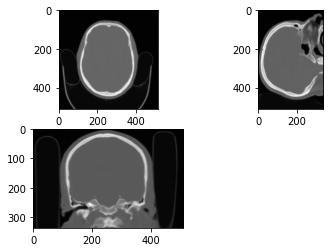

In [39]:
# plot 3 orthogonal slices
#ax_aspect = pixel_spacing[1]/pixel_spacing[0]
#sag_aspect = pixel_spacing[1] / slice_thickness
#cor_aspect = slice_thickness / pixel_spacing[0]

a1 = plt.subplot(2, 2, 1)
plt.imshow(arr[:, :, arr.shape[2]//2], cmap='gray')
# we are simply just taking the center of the plane img_shape[2]//2
#a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(arr[:, arr.shape[1]//2, :], cmap='gray')
#a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(arr[arr.shape[0]//2, :, :].T, cmap='gray')
#a3.set_aspect(cor_aspect)

plt.show()

(819, 819, 690)


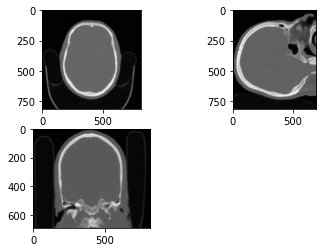

In [16]:
print(arr_resampled.shape)
# plot 3 orthogonal slices
ax_aspect = pixel_spacing[1]/pixel_spacing[0]
sag_aspect = pixel_spacing[1] / slice_thickness
cor_aspect = slice_thickness / pixel_spacing[0]

a1 = plt.subplot(2, 2, 1)
plt.imshow(arr_resampled[:, :, arr_resampled.shape[2]//2], cmap='gray')
# we are simply just taking the center of the plane img_shape[2]//2
#a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(arr_resampled[:, arr_resampled.shape[1]//2, :], cmap='gray')
#a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(arr_resampled[arr_resampled.shape[0]//2, :, :].T, cmap='gray')
#a3.set_aspect(cor_aspect)

plt.show()

In [18]:
if print(arr_resampled[0,0,0]) > THRESHOLD:
  print('Corners detected! Correcting of the corners/Excluding of the scans is needed before mask applying')
else:
  #masking
  pass

##  Applying mask to nd array
mask_arr = extract_head_mask(arr_resampled)
masked_arr = arr_resampled.copy()
masked_arr[~mask_arr] = HEAD_MASK_HU_AIR # consider using minimal HU value of input arra


# Pipeline

##First - to run first 4 cells of this notebook (to launch GDrive and to load all the packages). 

Second [OPTIONAL] - if this is the first run, to run all the cells to download the data from AWS. If not - skip it

##Third = to read the data from the ZIP files and choose the folders of the study we need 

In [5]:
tree = os.walk(home_path)
folder = []
for i in tree:
  folder.append(i)


for address, dirs, files in folder:
  print(address, dirs, files)
  break
  for dir in dirs:
    print('*****')
    print(files)
    print(dir)

/content/drive/MyDrive/VIZ ['.ipynb_checkpoints', 'CQ500CT0 CQ500CT0', 'CQ500CT1 CQ500CT1', 'CQ500CT10 CQ500CT10', 'CQ500CT100 CQ500CT100', 'CQ500CT101 CQ500CT101', 'CQ500CT102 CQ500CT102', 'CQ500CT103 CQ500CT103', 'CQ500CT104 CQ500CT104', 'CQ500CT105 CQ500CT105', 'CQ500CT106 CQ500CT106'] ['YdataDataset.txt', 'CQ500-CT-0.zip', 'CQ500-CT-1.zip', 'CQ500-CT-10.zip', 'CQ500-CT-100.zip', 'CQ500-CT-101.zip', 'CQ500-CT-102.zip', 'CQ500-CT-103.zip', 'CQ500-CT-104.zip', 'CQ500-CT-105.zip', 'CQ500-CT-106.zip']


## Forth - to run the second cell from previous chapter (Code from Coby 3rd meeting) --- I copied it here

In [10]:
# CELL WITH ALL THE FUNCTIONS WE NEED TO PREPROCESS THE DATA
def fast_check(slices, num=25, thick=2, psp=1):
  #to check slices on the number of slices (num=25), its thickness (thick=2), and pizel spasing (psp=1)
  wrong_thick, wrong_sp = [], []
  if len(slices) * slices[0].SliceThickness < num:
    print('!!! The number of slices is not enough in this study')
  else:
    print('number of slices - OK.')
  for each in slices:
    if each.SliceThickness > thick:
      wrong_thick.append((each.SliceLocation, each.SliceThickness))
    if (each.PixelSpacing[0] > psp) or (each.PixelSpacing[1] > psp):
      wrong_sp.append((each.SliceLocation, each.PixelSpacing))
  #printing result
  if len(wrong_sp) > 0:
    print('!!! the slices spacing is too big')
    for _ in wrong_sp:
      print('slice;', wrong_sp[0], ', spacing:', wrong_sp[1])
  else: 
    print('slice spacing - OK.')
    if (slices[0].PixelSpacing[0] != XY_P_SP_DESIRED) or (slices[0].PixelSpacing[1] != XY_P_SP_DESIRED):
      print('the X-Y spacing: ', slices[0].PixelSpacing, ' <> 0.625 as desidered. Zoom is needed')
    else:
      print('the X-Y spacing os OK:', slices[0].PixelSpacing)
  
  if len(wrong_thick) > 0:
    print('!!! the slices thickness is too large')
    for _ in wrong_thick:
      print('slice;', wrong_thick[0], ', thickness:', wrong_thick[1])
  else:
    print('slice thickness - OK.')



def load_dicoms(scan_dir, verboze=False):
    files = []
    file_paths = glob.glob(f'{scan_dir}/*.dcm')
    for fname in file_paths:
      if verboze:
        print("loading: {}".format(fname))
      files.append(pydicom.dcmread(fname))

    print("file count: {}".format(len(files)))

    # skip files with no SliceLocation (eg scout views)
    slices = []
    skipcount = 0
    for f in files:
        if hasattr(f, 'SliceLocation'):
            slices.append(f)
        else:
            skipcount = skipcount + 1

    print("skipped, no SliceLocation: {}".format(skipcount))
    # ensure they are in the correct order
    slices = sorted(slices, key=lambda s: s.SliceLocation)
    fast_check(slices, num=25, thick=2, psp=1)
    # pixel aspects, assuming all slices are the same
    pixel_spacing = slices[0].PixelSpacing
    slice_thickness = slices[0].SliceThickness
    dicom_count = len(slices)
    ax_aspect = pixel_spacing[1]/pixel_spacing[0]
    sag_aspect = pixel_spacing[1] / slice_thickness
    cor_aspect = slice_thickness / pixel_spacing[0]

    # create 3D array
    img_shape = list(slices[0].pixel_array.shape)
    img_shape.append(len(slices))
    img3d = np.zeros(img_shape)
    # fill 3D array with the images from the files
    for i, s in enumerate(slices):
        img2d = s.pixel_array
        img3d[:, :, i] = img2d
    return img3d, dicom_count, pixel_spacing,  slice_thickness


def mask_largest_component(mask):
    """
    Returns a mask that contains only the largest connected component in a given binary mask.
    """
    assert mask.ndim == 2
    if np.max(mask):
        (label_array, _) = morph.label(mask, background=False, return_num=True)
        label_sizes = np.bincount(label_array.ravel())
        label_of_largest_component = np.argmax(label_sizes[1:])+1
        return label_array == label_of_largest_component
    else:
        return mask


def extract_head_mask(arr):
    """
    Given a 3D array:
        - MIP along z axis
        - Threshold the HU levels
        - Keep largest connected component
    Return 3D binary mask of the head (2D mask repeated along Z axis)
    """
    assert arr.ndim == 3
    pixelwise_mask_arr = (np.max(arr, axis=2) > HEAD_MASK_HU_BONE_THRESHOLD) # check if this value is good fo all DS cases, maybe different scans have different scalse
    pixelwise_mask_largest_component = mask_largest_component(pixelwise_mask_arr)
    final_mask = morph.convex_hull_image(pixelwise_mask_largest_component)
    mask_arr = np.repeat(np.expand_dims(final_mask, axis=2), arr.shape[2], axis=2)
    return mask_arr

def resample_xy(arr, XY_P_SP_DESIRED, slice_thickness):
    corrected_slice_thickness = XY_P_SP_DESIRED
    ratio = float(slice_thickness) / float(corrected_slice_thickness)
    arr_resampled = zoom(arr, (ratio, ratio, 1), order=2)
    # the order by default is 3, should be within 0-5
    return arr_resampled


def resample_z_axis(arr, pixel_spacing, slice_thickness):
    corrected_slice_thickness = pixel_spacing[0]
    ratio = float(slice_thickness) / float(corrected_slice_thickness)
    arr_resampled = zoom(arr, (1, 1, ratio), order=2)
    # the order by default is 3, should be within 0-5
    return arr_resampled



def printing_image(array):
  print(array.shape)
  a1 = plt.subplot(2, 2, 1)
  plt.imshow(array[:, :, array.shape[2]//2], cmap='gray')
  # we are simply just taking the center of the plane img_shape[2]//2
  #a1.set_aspect(ax_aspect)
  a2 = plt.subplot(2, 2, 2)
  plt.imshow(array[:, array.shape[1]//2, :], cmap='gray')
  #a2.set_aspect(sag_aspect)

  a3 = plt.subplot(2, 2, 3)
  plt.imshow(array[array.shape[0]//2, :, :].T, cmap='gray')
  #a3.set_aspect(cor_aspect)
  plt.show()





##And finally preprocessing

In [11]:
#to save all the folders of the studies in a new variable 
study_folders = []
for name in os.listdir():
  if os.path.isdir(name):
    if name[0] == '.':
      pass
    else:
      study_folders.append(name)

In [12]:
patients_data = []
for folder in study_folders:
  checkpath = os.path.join(home_path, folder)
  j=0
  temp_data = []
  for each in os.walk(checkpath):
    if each[2] == []:
      pass
    else:
      j+=1 
      temp_data.append([folder, each[0]])
  if j == 1: #there is only one folder for the patient
    print('Adding data for the patient:', temp_data[0])
    patients_data.append(temp_data[0])
  else:
    found=False
    for each in temp_data:
      if 'thin' in each[1].lower():
        found=True
        print('Adding data for the patient:', each)
        patients_data.append(each)
        break
    if not found:
      patients_data.append(temp_data[0])
      print('Adding data for the patient:', temp_data[0])
  print('*****')

Adding data for the patient: ['CQ500CT0 CQ500CT0', '/content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT1 CQ500CT1', '/content/drive/MyDrive/VIZ/CQ500CT1 CQ500CT1/Unknown Study/CT 2.55mm']
*****
Adding data for the patient: ['CQ500CT10 CQ500CT10', '/content/drive/MyDrive/VIZ/CQ500CT10 CQ500CT10/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT100 CQ500CT100', '/content/drive/MyDrive/VIZ/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN']
*****
Adding data for the patient: ['CQ500CT101 CQ500CT101', '/content/drive/MyDrive/VIZ/CQ500CT101 CQ500CT101/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT102 CQ500CT102', '/content/drive/MyDrive/VIZ/CQ500CT102 CQ500CT102/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT103 CQ500CT103', '/content/drive/MyDrive/VIZ/CQ500CT103 CQ500CT103/Unknown Study/CT Thin Plain']
*****
Adding data for the patient: ['CQ500C

Finally we have the array with all the folders with different studies for the chosen patients (we chose THIN folder if we have it)

##Fast Preprocessing 

### Scaling

In [13]:
#CONSTANTS
import glob
import numpy as np
import pydicom
from scipy.ndimage import zoom
import skimage.morphology as morph

# check if this value is good fo all DS cases, maybe different scans have different scalse
HEAD_MASK_HU_BONE_THRESHOLD = 1500
HEAD_MASK_HU_AIR = 0
XY_P_SP_DESIRED = 0.625
THRESHOLD = 100


file count: 240
skipped, no SliceLocation: 0
number of slices - OK.
slice spacing - OK.
the X-Y spacing:  [0.451172, 0.451172]  <> 0.625 as desidered. Zoom is needed
slice thickness - OK.
(512, 512, 332)


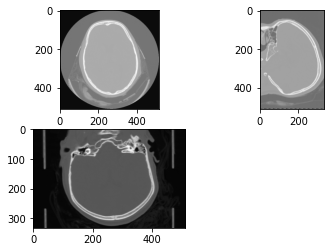

file count: 36
skipped, no SliceLocation: 0
number of slices - OK.
slice spacing - OK.
the X-Y spacing:  [0.564453, 0.564453]  <> 0.625 as desidered. Zoom is needed
!!! the slices thickness is too large
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')
slice; ('-68.75', '5.0') , thickness: ('-63.574', '5.0')

In [ ]:
#preprocessing all the studies 
processed_data = {}
for patient in patients_data:
  scan_dir = patient[1]
  arr, dicom_count, pixel_spacing, slice_thickness = load_dicoms(scan_dir, False)

  if (pixel_spacing[0] != XY_P_SP_DESIRED) or (pixel_spacing[1] != XY_P_SP_DESIRED):
    arr_res_xy = resample_xy(arr, XY_P_SP_DESIRED, slice_thickness)
    arr_resampled = resample_z_axis(arr_res_xy, pixel_spacing, slice_thickness)
  else:
    arr_resampled = resample_z_axis(arr, pixel_spacing, slice_thickness)
  processed_data[patient[0]] = arr_resampled
  printing_image(arr_resampled)


So as a result of previous stage we have a dictionary where the key is the unique name of the study and the content is 3d array which is checked and scaled

You need to add background removing. I think you can just re-write it to the according 

### Removing background